In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math
import dask.dataframe as dd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from string import ascii_letters


In [2]:
df = dd.read_csv("vehicles.csv")

In [3]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [4]:
len(df)

426880

In [5]:
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [6]:
a = df['state'].unique()
print(sorted(a))

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [7]:
df=df[df.state == "ny"]

In [8]:
drop_columns = ['id', 'url', 'region', 'region_url', 'image_url', 'description', 'county','state', 'lat', 'long','posting_date','VIN']

In [9]:
df = df.drop(columns = drop_columns)

In [10]:
df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
dtype: object

In [11]:
df = df.compute()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19386 entries, 5 to 18687
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         19386 non-null  int64  
 1   year          19374 non-null  float64
 2   manufacturer  18560 non-null  object 
 3   model         19164 non-null  object 
 4   condition     14651 non-null  object 
 5   cylinders     10943 non-null  object 
 6   fuel          19310 non-null  object 
 7   odometer      19339 non-null  float64
 8   title_status  19307 non-null  object 
 9   transmission  19287 non-null  object 
 10  drive         12612 non-null  object 
 11  size          5654 non-null   object 
 12  type          15559 non-null  object 
 13  paint_color   14368 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 2.2+ MB


In [13]:
missing_values_count = df.isnull().sum()
missing_values_count

price               0
year               12
manufacturer      826
model             222
condition        4735
cylinders        8443
fuel               76
odometer           47
title_status       79
transmission       99
drive            6774
size            13732
type             3827
paint_color      5018
dtype: int64

In [14]:
len(df)

19386

In [15]:
df['price'].describe()

count     19386.000000
mean      16976.520118
std       14857.586957
min           0.000000
25%        5900.000000
50%       13500.000000
75%       25990.000000
max      261895.000000
Name: price, dtype: float64

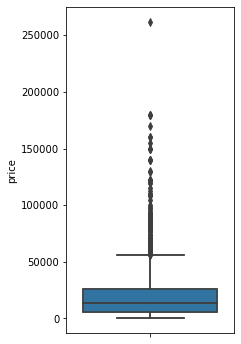

In [16]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=df, showfliers=False)
sns.boxplot(y='price', data=df);

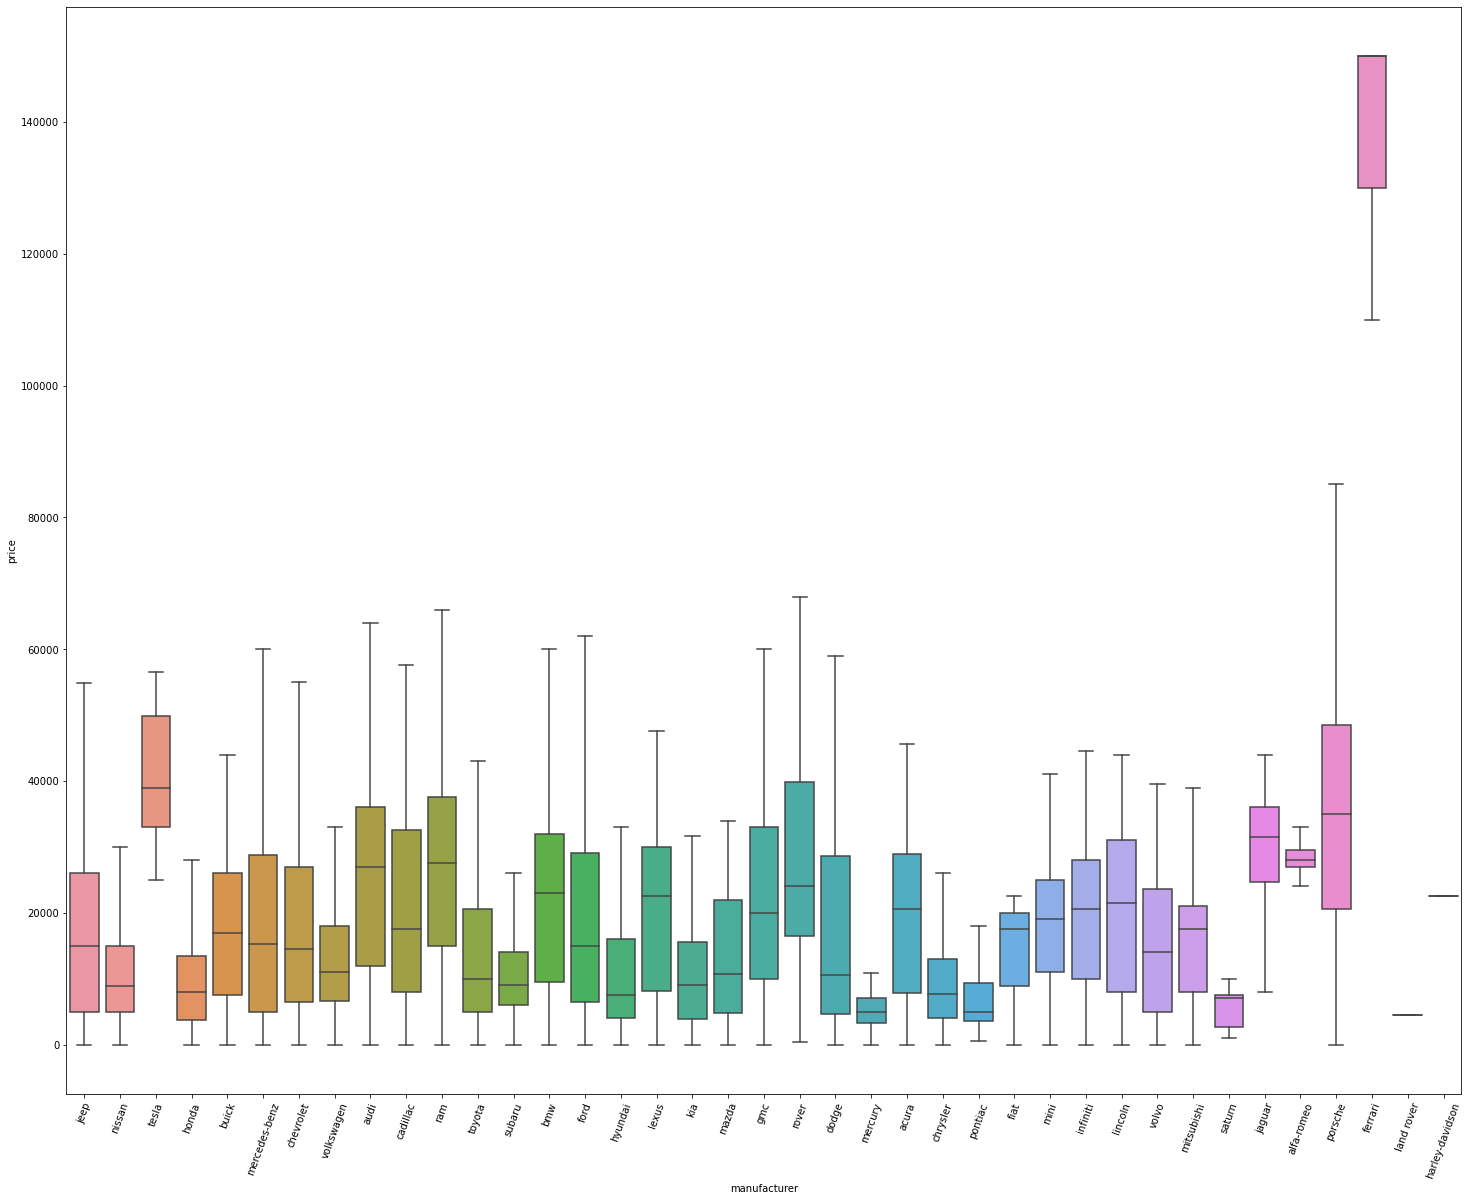

In [17]:
plt.figure(figsize=(25,20))
plt.xticks(rotation=70)
sns.boxplot(y='price', x='manufacturer', data=df, showfliers=False)

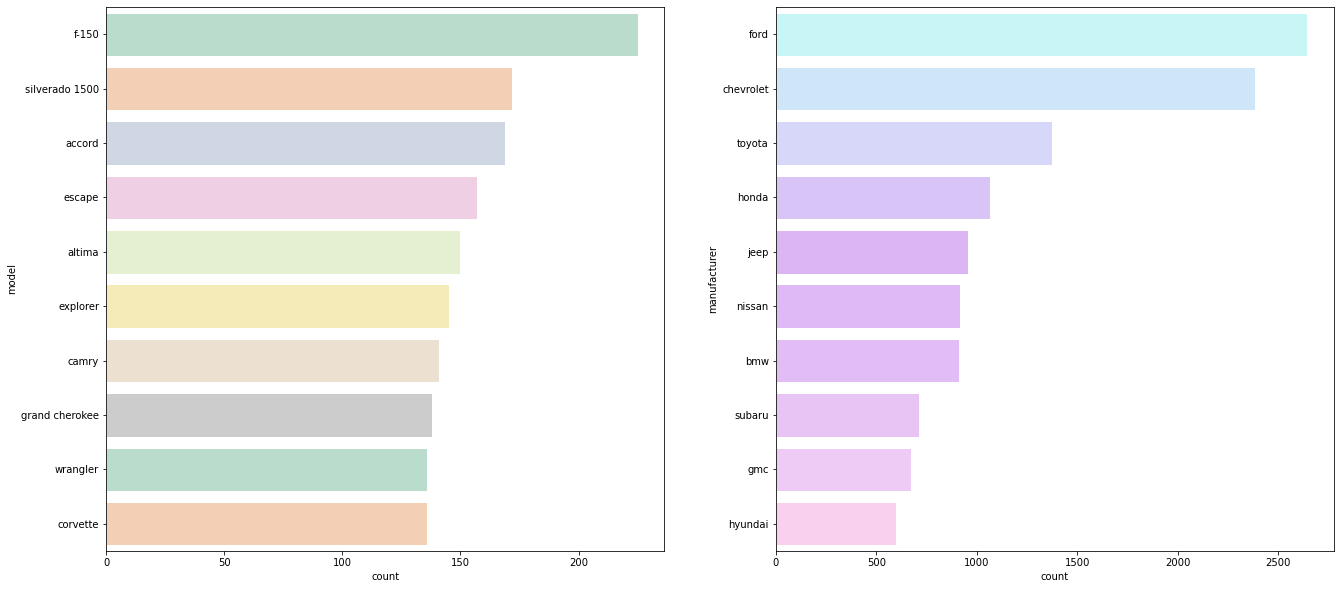

In [18]:
colors = ["#C0FDFF", "#C8E7FF","#D0D1FF","#D8BBFF","#DEAAFF","#E2AFFF","#E5B3FE","#ECBCFD","#F3C4FB","#FFCBF2"]
sns.set_palette(sns.color_palette(colors))


fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':20,'ytick.labelsize':20})
sns.countplot(y ='manufacturer',data = df,order=df.manufacturer.value_counts().iloc[:10].index, ax = ax[1],palette = colors) 
sns.countplot(y ='model',data = df,order=df.model.value_counts().iloc[:10].index, ax= ax[0],palette = "Pastel2")
fig.show()

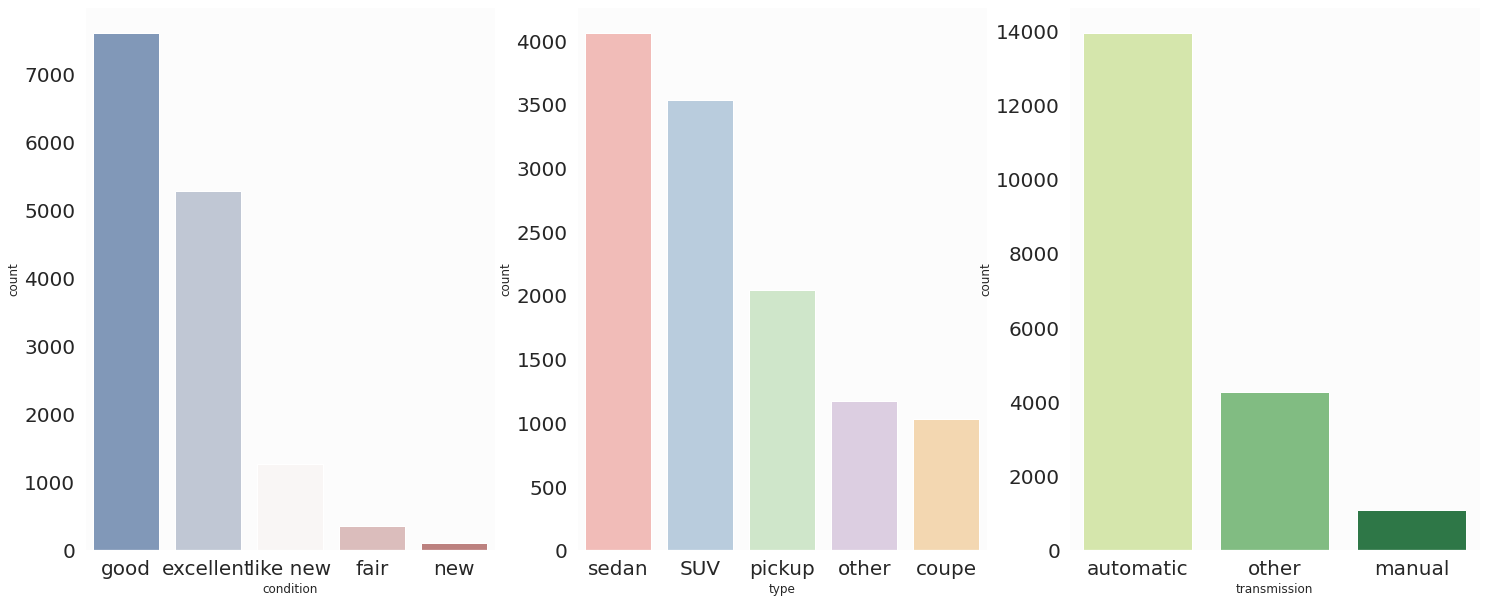

In [19]:
fig, ax =plt.subplots(1,3,figsize=(25, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.countplot(x ='condition',data = df,order=df.condition.value_counts().iloc[:5].index, ax = ax[0],palette="vlag")
sns.countplot(x ='type',data = df,order=df.type.value_counts().iloc[:5].index, ax = ax[1],palette="Pastel1")
sns.countplot(x ='transmission',data = df,order=df.transmission.value_counts().iloc[:5].index, ax = ax[2],palette="YlGn")
fig.show()

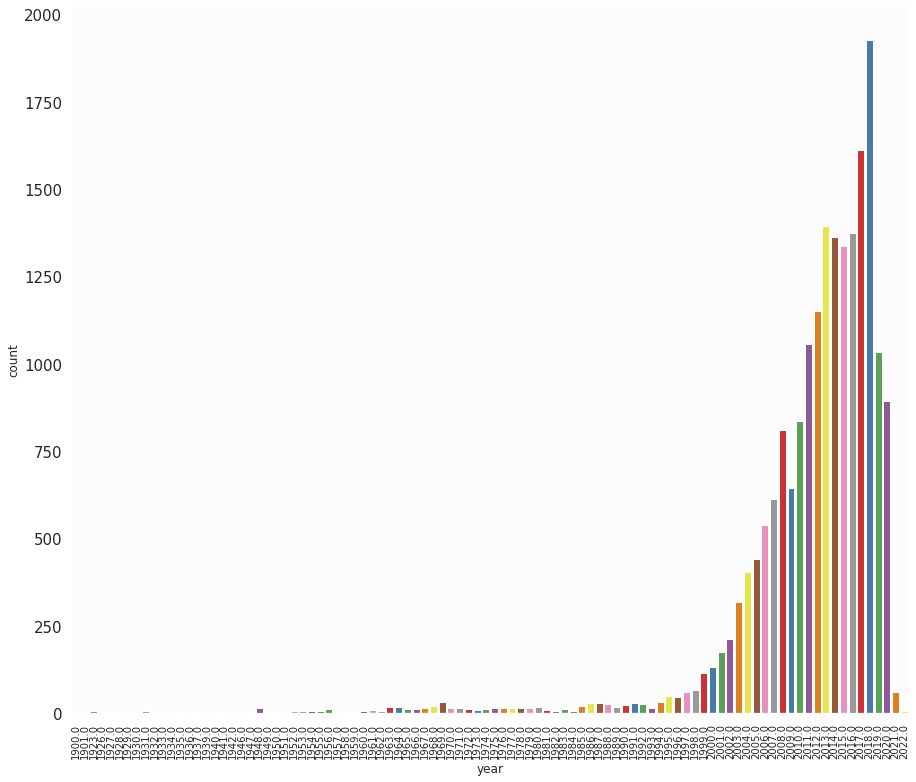

In [20]:
plt.figure(figsize=(15, 13))
ax = sns.countplot(x = 'year', data=df, palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10);

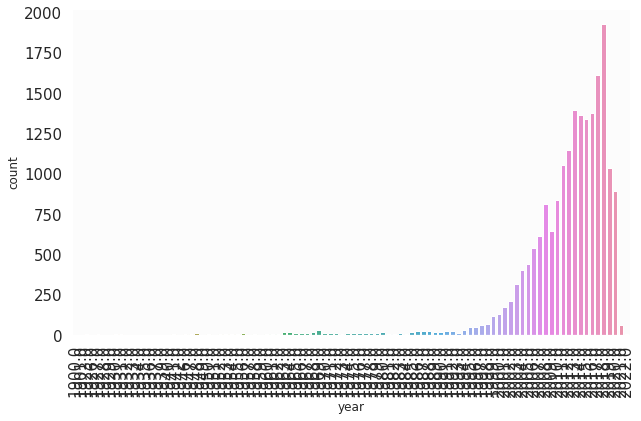